In [2148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
from sklearn.preprocessing import StandardScaler

font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

plt.rcParams['font.family'] = 'Malgun Gothic'

import warnings

warnings.filterwarnings("ignore")

In [2149]:
def data_preprocessing(train, test):
    
    error_data = ['C2085', 'C1397', 'C2431', 'C1649', 'C1095', 'C2051', 'C1218', 'C1894', 'C2483', 'C1502', 'C1988']

    for error in error_data :
        train = train[train['단지코드'] != error]


    train.loc[train.임대보증금=='-', '임대보증금'] = np.nan
    test.loc[test.임대보증금=='-', '임대보증금'] = np.nan
    train['임대보증금'] = train['임대보증금'].astype(float)
    test['임대보증금'] = test['임대보증금'].astype(float)
    
    train['총세대수'] = train['총세대수'].astype(float)
    test['총세대수'] = test['총세대수'].astype(float)

    train.loc[train.임대료=='-', '임대료'] = np.nan
    test.loc[test.임대료=='-', '임대료'] = np.nan
    train['임대료'] = train['임대료'].astype(float)
    test['임대료'] = test['임대료'].astype(float)

    train[['임대보증금', '임대료']] = train[['임대보증금', '임대료']].fillna(0)
    test[['임대보증금', '임대료']] = test[['임대보증금', '임대료']].fillna(0)

    cols = ['도보 10분거리 내 지하철역 수(환승노선 수 반영)', '도보 10분거리 내 버스정류장 수']
    train[cols] = train[cols].fillna(0)
    test[cols] = test[cols].fillna(0)
    
    test.loc[test.단지코드.isin(['C2411']) & test.자격유형.isnull(), '자격유형'] = 'A'
    test.loc[test.단지코드.isin(['C2253']) & test.자격유형.isnull(), '자격유형'] = 'C'
    
    train = train.drop_duplicates()
    test = test.drop_duplicates()
    
    return train, test

In [2150]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train_money = pd.read_csv('train_final_1004_ver3.csv')
test_money = pd.read_csv('test_final_1004_ver3.csv')

In [2151]:
train, test = data_preprocessing(train, test)
train.shape, test.shape

((2556, 15), (949, 14))

In [2152]:
test.head()

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수
0,C1072,754.0,아파트,경기도,국민임대,39.79,116,14.0,H,22830000.0,189840.0,0.0,2.0,683.0
1,C1072,754.0,아파트,경기도,국민임대,46.81,30,14.0,A,36048000.0,249930.0,0.0,2.0,683.0
2,C1072,754.0,아파트,경기도,국민임대,46.90,112,14.0,H,36048000.0,249930.0,0.0,2.0,683.0
3,C1072,754.0,아파트,경기도,국민임대,46.90,120,14.0,H,36048000.0,249930.0,0.0,2.0,683.0
4,C1072,754.0,아파트,경기도,국민임대,51.46,60,14.0,H,43497000.0,296780.0,0.0,2.0,683.0


In [2153]:
train.head(7)

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
8,C2515,545.0,아파트,경상남도,국민임대,33.48,276,17.0,A,9216000.0,82940.0,0.0,3.0,624.0,205.0
9,C2515,545.0,아파트,경상남도,국민임대,39.60,60,17.0,A,12672000.0,107130.0,0.0,3.0,624.0,205.0
10,C2515,545.0,아파트,경상남도,국민임대,39.60,20,17.0,A,12672000.0,107130.0,0.0,3.0,624.0,205.0
11,C2515,545.0,아파트,경상남도,국민임대,46.90,38,17.0,A,18433000.0,149760.0,0.0,3.0,624.0,205.0
12,C2515,545.0,아파트,경상남도,국민임대,46.90,19,17.0,A,18433000.0,149760.0,0.0,3.0,624.0,205.0
13,C2515,545.0,아파트,경상남도,국민임대,51.97,106,17.0,A,23042000.0,190090.0,0.0,3.0,624.0,205.0
14,C2515,545.0,아파트,경상남도,국민임대,51.97,26,17.0,A,23042000.0,190090.0,0.0,3.0,624.0,205.0


In [2154]:
# test[test['단지코드']=='C1006']

In [2155]:
train['임대료'] = train_money['임대료'].values
train['임대보증금'] = train_money['임대보증금'].values

In [2156]:
test['임대료'] = test_money['임대료'].values
test['임대보증금'] = test_money['임대보증금'].values

<AxesSubplot:xlabel='전용면적', ylabel='Density'>

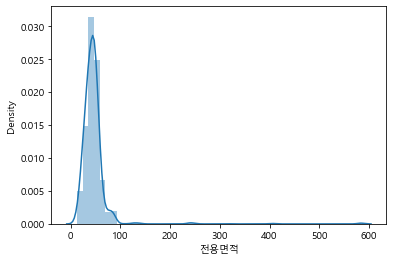

In [2157]:
sns.distplot(train['전용면적'])

In [2158]:
area_mean = train['전용면적'].mean()

In [2159]:
area_mean

45.759820031298794

In [2160]:
train['면적기준이상'] = np.where(train['전용면적']>=area_mean,1,0)
test['면적기준이상'] = np.where(test['전용면적']>=area_mean,1,0)

In [2161]:
train = train[train.단지코드 != 'C1804']
train = train[train.단지코드 != 'C2405']
train = train[train.단지코드 != 'C1740']
train = train[train.단지코드 != 'C1206']

In [2162]:
# train['실거주세대수'] = train['총세대수'] - train['공가수']
# test['실거주세대수'] = test['총세대수'] - test['공가수']

In [2163]:
unique_cols = ['총세대수', '지역', '공가수', '임대보증금','임대료',
           '도보 10분거리 내 지하철역 수(환승노선 수 반영)', '면적기준이상',
           '도보 10분거리 내 버스정류장 수',
           '단지내주차면수', '등록차량수','단지코드']


index_arr = []
for r in train.values:
    index_arr.append(r[0] +"_"+ str(r[5]))
    
train['단지_면적_코드'] = index_arr
train_agg = train.set_index('단지_면적_코드')[unique_cols].drop_duplicates()


index_arr2 = []
for r in test.values:
    index_arr2.append(r[0] +"_"+ str(r[5]))

test['단지_면적_코드'] = index_arr2
test_agg = test.set_index('단지_면적_코드')[[col for col in unique_cols if col!='등록차량수']].drop_duplicates()


In [2164]:
train_agg.head()

,총세대수,지역,공가수,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),면적기준이상,도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수,단지코드
단지_면적_코드,,,,,,,,,,,
C2515_33.48,545.0,경상남도,17.0,9216000.0,82940.0,0.0,0,3.0,624.0,205.0,C2515
C2515_39.6,545.0,경상남도,17.0,12672000.0,107130.0,0.0,0,3.0,624.0,205.0,C2515
C2515_46.9,545.0,경상남도,17.0,18433000.0,149760.0,0.0,1,3.0,624.0,205.0,C2515
C2515_51.97,545.0,경상남도,17.0,23042000.0,190090.0,0.0,1,3.0,624.0,205.0,C2515
C1407_30.95,1216.0,대전광역시,13.0,15620000.0,127350.0,1.0,0,1.0,1285.0,1064.0,C1407


In [2165]:
train_agg.shape, test_agg.shape

((1495, 11), (573, 10))

In [2166]:
# train.loc[train.자격유형.isin(['J', 'L', 'K', 'N', 'M', 'O']), '자격유형'] = '행복주택_공급대상'
# test.loc[test.자격유형.isin(['J', 'L', 'K', 'N', 'M', 'O']), '자격유형'] = '행복주택_공급대상'

# train.loc[train.자격유형.isin(['H', 'B', 'E', 'G']), '자격유형'] = '국민임대/장기전세_공급대상'
# test.loc[test.자격유형.isin(['H', 'B', 'E', 'G']), '자격유형'] = '국민임대/장기전세_공급대상'

# train.loc[train.자격유형.isin(['C', 'I', 'F']), '자격유형'] = '영구임대_공급대상'
# test.loc[test.자격유형.isin(['C', 'I', 'F']), '자격유형'] = '영구임대_공급대상'

In [2167]:
train.loc[train.공급유형.isin(['공공임대(5년)', '공공분양', '공공임대(10년)', '공공임대(분납)']), '공급유형'] = '공공임대(5년/10년/분납/분양)'
test.loc[test.공급유형.isin(['공공임대(5년)', '공공분양', '공공임대(10년)', '공공임대(분납)']), '공급유형'] = '공공임대(5년/10년/분납/분양)'
train.loc[train.공급유형.isin(['장기전세', '국민임대']), '공급유형'] = '국민임대/장기전세'
test.loc[test.공급유형.isin(['장기전세', '국민임대']), '공급유형'] = '국민임대/장기전세'

train.loc[train.자격유형.isin(['J', 'L', 'K', 'N', 'M', 'O']), '자격유형'] = '행복주택_공급대상'
test.loc[test.자격유형.isin(['J', 'L', 'K', 'N', 'M', 'O']), '자격유형'] = '행복주택_공급대상'

train.loc[train.자격유형.isin(['H', 'B', 'E', 'G']), '자격유형'] = '국민임대/장기전세_공급대상'
test.loc[test.자격유형.isin(['H', 'B', 'E', 'G']), '자격유형'] = '국민임대/장기전세_공급대상'

train.loc[train.자격유형.isin(['C', 'I', 'F']), '자격유형'] = '영구임대_공급대상'
test.loc[test.자격유형.isin(['C', 'I', 'F']), '자격유형'] = '영구임대_공급대상'


In [2168]:
# train.loc[train.공급유형.isin(['공공임대(5년)', '공공임대(10년)', '공공임대(분납)']), '공급유형'] = '공공임대(5년/10년/분납)'
# test.loc[test.공급유형.isin(['공공임대(5년)', '공공임대(10년)', '공공임대(분납)']), '공급유형'] = '공공임대(5년/10년/분납)'
# train.loc[train.공급유형.isin(['장기전세', '국민임대']), '공급유형'] = '국민임대/장기전세'
# test.loc[test.공급유형.isin(['장기전세', '국민임대']), '공급유형'] = '국민임대/장기전세'



# train.loc[train.자격유형.isin(['J', 'L', 'K', 'N', 'M', 'O']), '자격유형'] = '행복주택_공급대상'
# test.loc[test.자격유형.isin(['J', 'L', 'K', 'N', 'M', 'O']), '자격유형'] = '행복주택_공급대상'

# train.loc[train.자격유형.isin(['H', 'B', 'E', 'G']), '자격유형'] = '국민임대/장기전세_공급대상'
# test.loc[test.자격유형.isin(['H', 'B', 'E', 'G']), '자격유형'] = '국민임대/장기전세_공급대상'

# train.loc[train.자격유형.isin(['C', 'I', 'F']), '자격유형'] = '영구임대_공급대상'
# test.loc[test.자격유형.isin(['C', 'I', 'F']), '자격유형'] = '영구임대_공급대상'


In [2169]:
def reshape_cat_features(data, cast_col, value_col):
        res = data.drop_duplicates(["단지_면적_코드", cast_col]).assign(counter=1).pivot(index='단지_면적_코드', columns=cast_col, values=value_col).fillna(0)
        res.columns.name = None
        res = res.rename(columns={col:cast_col+'_'+str(col) for col in res.columns})
        return res

    
    

In [2170]:
area_person = train.groupby('단지_면적_코드').sum()['전용면적별세대수']
area_person
# res.columns.name = None
# res = res.rename(columns={col:cast_col+'_'+str(col) for col in res.columns})
area_person_test = test.groupby('단지_면적_코드').sum()['전용면적별세대수']

In [2171]:
train_agg = pd.merge(train_agg, reshape_cat_features(data=train, cast_col='임대건물구분', value_col='counter'), left_index=True, right_index=True)
train_agg = pd.merge(train_agg, reshape_cat_features(data=train, cast_col='공급유형', value_col='counter'), left_index=True, right_index=True)
train_agg = pd.merge(train_agg, area_person,left_index=True, right_index=True)
X_train = pd.merge(train_agg, reshape_cat_features(data=train, cast_col='자격유형', value_col='counter'), left_index=True, right_index=True)

test_agg = pd.merge(test_agg, reshape_cat_features(data=test, cast_col='임대건물구분', value_col='counter'), left_index=True, right_index=True)
test_agg = pd.merge(test_agg, reshape_cat_features(data=test, cast_col='공급유형', value_col='counter'), left_index=True, right_index=True)
test_agg = pd.merge(test_agg, area_person_test,left_index=True, right_index=True)
X_test = pd.merge(test_agg, reshape_cat_features(data=test, cast_col='자격유형', value_col='counter'), left_index=True, right_index=True)


# X_train = pd.concat([train_agg,
#                        reshape_cat_features(data=train, cast_col='임대건물구분', value_col='counter'),
#                        reshape_cat_features(data=train, cast_col='공급유형', value_col='counter'),
#                        reshape_cat_features(data=train, cast_col='자격유형', value_col='counter'),
#                        ], axis=1)

# X_test = pd.concat([test_agg,
#                        reshape_cat_features(data=test, cast_col='임대건물구분', value_col='counter'),
#                        reshape_cat_features(data=test, cast_col='공급유형', value_col='counter'),
#                        reshape_cat_features(data=test, cast_col='자격유형', value_col='counter'),
#                   ], axis=1)

In [2172]:
region_regi_car = train.groupby(['지역'])['등록차량수','총세대수'].sum()
region_regi_car['지역_세대당차량수'] = region_regi_car['등록차량수'] / region_regi_car['총세대수']
region_mapping = region_regi_car.drop(['등록차량수','총세대수'],axis=1)


mapping_values = []
for r in X_train['지역'].values:
    mapping_values.extend([region_mapping.loc[r].values])
region_car = pd.DataFrame(mapping_values, columns = ['지역_세대당차량수'], index = X_train.index)
X_train = pd.concat([X_train,region_car], axis= 1).drop(columns = ['지역'])

mapping_values = []
for r in X_test['지역'].values:
    mapping_values.extend([region_mapping.loc[r].values])
region_car = pd.DataFrame(mapping_values, columns = ['지역_세대당차량수'], index = X_test.index)
X_test = pd.concat([X_test,region_car], axis= 1).drop(columns = ['지역'])

In [2173]:
train.head()

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수,면적기준이상,단지_면적_코드
8,C2515,545.0,아파트,경상남도,국민임대/장기전세,33.48,276,17.0,A,9216000.0,82940.0,0.0,3.0,624.0,205.0,0,C2515_33.48
9,C2515,545.0,아파트,경상남도,국민임대/장기전세,39.60,60,17.0,A,12672000.0,107130.0,0.0,3.0,624.0,205.0,0,C2515_39.6
10,C2515,545.0,아파트,경상남도,국민임대/장기전세,39.60,20,17.0,A,12672000.0,107130.0,0.0,3.0,624.0,205.0,0,C2515_39.6
11,C2515,545.0,아파트,경상남도,국민임대/장기전세,46.90,38,17.0,A,18433000.0,149760.0,0.0,3.0,624.0,205.0,1,C2515_46.9
12,C2515,545.0,아파트,경상남도,국민임대/장기전세,46.90,19,17.0,A,18433000.0,149760.0,0.0,3.0,624.0,205.0,1,C2515_46.9


In [2174]:
from sklearn.preprocessing import StandardScaler
scailing_features = ['총세대수',
                     '공가수',
                     '도보 10분거리 내 버스정류장 수',
                     '임대보증금',
                     '임대료',
                     '단지내주차면수',
                     '도보 10분거리 내 지하철역 수(환승노선 수 반영)',
                     '지역_세대당차량수',
                     '전용면적별세대수',
                     
                    ]


# scaler = StandardScaler()
# X_train.loc[:, scailing_features] = scaler.fit_transform(X_train[scailing_features])
# X_test.loc[:, scailing_features] = scaler.transform(X_test[scailing_features])

X_train.loc[:,scailing_features] = np.log1p(X_train[scailing_features])
X_test.loc[:,scailing_features] = np.log1p(X_test[scailing_features])

In [2175]:
X_train.shape, X_test.shape

((1495, 25), (573, 24))

In [2176]:
test_code = X_test['단지코드']

In [2177]:
test_code

단지_면적_코드
C1003_16.69    C1003
C1003_26.34    C1003
C1003_26.52    C1003
C1003_36.31    C1003
C1003_44.16    C1003
               ...  
C2688_26.59    C2688
C2688_33.53    C2688
C2688_46.53    C2688
C2691_74.89    C2691
C2691_84.84    C2691
Name: 단지코드, Length: 573, dtype: object

In [2178]:
X = X_train.drop(columns = ['등록차량수','단지코드'], axis=1)
y = np.log1p(X_train['등록차량수'])
X_test = X_test.drop(['단지코드'], axis=1)

In [2179]:
X_train.head(1)

,총세대수,공가수,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),면적기준이상,도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수,단지코드,...,공급유형_영구임대,공급유형_임대상가,공급유형_행복주택,전용면적별세대수,자격유형_A,자격유형_D,자격유형_국민임대/장기전세_공급대상,자격유형_영구임대_공급대상,자격유형_행복주택_공급대상,지역_세대당차량수
단지_면적_코드,,,,,,,,,,,,,,,,,,,,,
C1000_39.57,6.340359,2.397895,16.195335,11.472426,0.0,0,0.693147,6.084499,481.0,C1000,...,0.0,0.0,0.0,5.843544,1.0,0.0,0.0,0.0,0.0,0.589627


In [2180]:
# X_smote = X_train.drop(['임대건물구분_상가','단지코드'],axis=1)
# y_smote = X_train['임대건물구분_상가']
# X_test = X_test.drop(['단지코드'], axis=1)

# # imbalanced-learn 패키지
# from imblearn.over_sampling import SMOTE

# # SMOTE 객체 생성
# smote = SMOTE(random_state=42)
    
# # 샘플링
# X_over, y_over = smote.fit_resample(X_smote, y_smote)
# train_over = pd.concat([X_over, y_over], axis=1)

# # train_over.columns
# X = train_over.drop(columns = ['등록차량수'], axis=1)
# y = np.log1p(train_over['등록차량수'])


In [2181]:
# X = X.drop(['총세대수', '임대보증금', '자격유형_D', '공급유형_영구임대'], axis=1)
# X_test = X_test.drop(['총세대수', '임대보증금', '자격유형_D', '공급유형_영구임대'], axis=1) 116점 나온제출

In [2182]:
# X = X.drop(['총세대수','공가수'], axis=1)
# X_test = X_test.drop(['총세대수','공가수'], axis=1)  

In [2183]:
X.columns

Index(['총세대수', '공가수', '임대보증금', '임대료', '도보 10분거리 내 지하철역 수(환승노선 수 반영)', '면적기준이상',
       '도보 10분거리 내 버스정류장 수', '단지내주차면수', '임대건물구분_상가', '임대건물구분_아파트',
       '공급유형_공공임대(50년)', '공급유형_공공임대(5년/10년/분납/분양)', '공급유형_국민임대/장기전세',
       '공급유형_영구임대', '공급유형_임대상가', '공급유형_행복주택', '전용면적별세대수', '자격유형_A', '자격유형_D',
       '자격유형_국민임대/장기전세_공급대상', '자격유형_영구임대_공급대상', '자격유형_행복주택_공급대상', '지역_세대당차량수'],
      dtype='object')

In [2184]:
# X = X.drop([ '임대보증금', '자격유형_D', '공급유형_영구임대','공급유형_행복주택','공급유형_임대상가'], axis=1)
# X_test = X_test.drop([ '임대보증금', '자격유형_D', '공급유형_영구임대','공급유형_행복주택','공급유형_임대상가'], axis=1)


In [2185]:
# X = X.drop(['자격유형_영구임대_공급대상','공급유형_행복주택','공급유형_임대상가'], axis=1)
# X_test = X_test.drop(['자격유형_영구임대_공급대상','공급유형_행복주택','공급유형_임대상가'], axis=1)
# 아무것도 삭제 안하고 제출했을 때 : 113, 118

In [2186]:
from sklearn.model_selection import KFold

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression

def kfold_val(n, model, X_data, y_target,expm1):
    kfold = KFold(n_splits=n)
    cv_mae=[]

    n_iter = 0 

    for train_index, test_index in kfold.split(X_data):
        X_train, X_test = X_data.iloc[train_index], X_data.iloc[test_index]
        y_train, y_test = y_target[train_index], y_target[test_index]
        # 학습 및 예측
        

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        n_iter += 1

        if expm1 :
            y_t = np.expm1(y_test)
            y_p = np.expm1(y_pred)
        else:
            y_t = y_test
            y_p = y_pred

        a = 0
        mae = mean_absolute_error(y_t,y_p)
        train_size = X_train.shape[0]
        test_size = X_test.shape[0]
#         print('\n#{0} 교차 검증 MAE :{1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'.format(n_iter, mae, train_size, test_size))
        cv_mae.append(mae)
    # 개별 iteration별 정확도를 합하여 평균 정확도 계산
    print(model, '\n## 평균 검증 MAE:', np.mean(cv_mae))
    return np.mean(cv_mae)

In [2187]:
from sklearn.model_selection import GridSearchCV

def get_best_params(model, params,X_data, y_target):
    grid_model = GridSearchCV(model, param_grid=params, 
                              scoring='neg_mean_absolute_error', cv=10)
    grid_model.fit(X_data, y_target)
    mae = -1 *  grid_model.best_score_
    print('{0} 5 CV 시 최적 평균 로그 변환된 MAE 값: {1}, 최적 alpha:{2}'.format(model.__class__.__name__,
                                        np.round(mae, 4), grid_model.best_params_))
    return grid_model.best_estimator_

In [2188]:
from sklearn.preprocessing import PolynomialFeatures
poly_X = PolynomialFeatures(degree=2, include_bias=False).fit_transform(X)
poly_X = pd.DataFrame(poly_X)

poly_test = PolynomialFeatures(degree=2, include_bias=False).fit_transform(X_test)
poly_test = pd.DataFrame(poly_test)

In [2189]:
print(y)

단지_면적_코드
C1000_39.57    6.177944
C1000_46.7     6.177944
C1000_51.93    6.177944
C1004_14.1     4.543295
C1004_19.0     4.543295
                 ...   
C2680_36.63    6.381816
C2680_46.71    6.381816
C2692_36.64    6.082219
C2692_46.49    6.082219
C2692_51.59    6.082219
Name: 등록차량수, Length: 1495, dtype: float64


In [2086]:
from statsmodels.stats.outliers_influence import OLSInfluence
import statsmodels.api as sm
y = list(y)
OLS = sm.OLS(y, poly_X)
result = OLS.fit()
influence = OLSInfluence(result)

weight = (influence.cooks_distance[0]).to_numpy()

for i in range(len(weight)):
    if weight[i] < 0.00000001:
        weight[i] = 0.9
    elif weight[i] < 0.0000001:
        weight[i] = 0.8
    elif weight[i] < 0.000001:
        weight[i] = 0.7
    elif weight[i] < 0.00001:
        weight[i] = 0.6
    elif weight[i] < 0.0001:
        weight[i] = 0.5
    elif weight[i] < 0.001:
        weight[i] = 0.4
    elif weight[i] < 0.01:
        weight[i] = 0.3
    elif weight[i] < 0.1:
        weight[i] = 0.2
    else:
        weight[i] = 0.1

In [2096]:
from sklearn.model_selection import StratifiedKFold
y = pd.Series(y)

y_cat = pd.cut(y, 10, labels=range(10))

skf = StratifiedKFold(5)

ridge_params = {'alpha' : [0.05,0.1,1,5,8,10,12,13,14,15,16,17,20,25]}
lasso_params = {'alpha' : [0.0005,0.001,0.005, 0.008,0.05, 0.03, 0.1, 0.5, 1.5,10]}
elastic_params = {'alpha' : [0.0005,0.001,0.005, 0.008,0.05, 0.03, 0.1, 0.5, 1.5,10]}

ridge_reg = Ridge()
lasso_reg = Lasso()
elastic_reg = ElasticNet()

best_ridge=get_best_params(ridge_reg,ridge_params,poly_X,y)
best_lasso = get_best_params(lasso_reg,lasso_params,poly_X,y)
best_elastic = get_best_params(elastic_reg,elastic_params,poly_X,y)

# lr_reg = LinearRegression()
ridge_reg = Ridge(alpha=best_ridge.alpha)
lasso_reg = Lasso(alpha=best_lasso.alpha)
elastic_reg = ElasticNet(alpha=best_elastic.alpha)

cv_mae = []
models = [ridge_reg, lasso_reg,elastic_reg]
for model in models:
    cv_mae=[]
    for train_index, test_index in skf.split(poly_X, y_cat) :
        X_train, X_te = poly_X.iloc[train_index], poly_X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        weight_tr = weight[train_index]

        model.fit(X_train, y_train,sample_weight=weight_tr)
        y_pred = model.predict(X_te)
        y_t = np.expm1(y_test)
        y_p = np.expm1(y_pred)


        a = 0
        mae = mean_absolute_error(y_t,y_p)
        train_size = X_train.shape[0]
        test_size = X_te.shape[0]
        #         print('\n#{0} 교차 검증 MAE :{1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'.format(n_iter, mae, train_size, test_size))
        cv_mae.append(mae)
        # 개별 iteration별 정확도를 합하여 평균 정확도 계산
    print(model, '\n## 평균 검증 MAE:', np.mean(cv_mae))

  



Ridge 5 CV 시 최적 평균 로그 변환된 MAE 값: 0.2788, 최적 alpha:{'alpha': 14}
Lasso 5 CV 시 최적 평균 로그 변환된 MAE 값: 0.2792, 최적 alpha:{'alpha': 0.001}
ElasticNet 5 CV 시 최적 평균 로그 변환된 MAE 값: 0.2792, 최적 alpha:{'alpha': 0.001}
Ridge(alpha=14) 
## 평균 검증 MAE: 109.42553200763363
Lasso(alpha=0.001) 
## 평균 검증 MAE: 109.11823338005954
ElasticNet(alpha=0.001) 
## 평균 검증 MAE: 109.63004576069495


In [2004]:
print(y)

0       6.177944
1       6.177944
2       6.177944
3       4.543295
4       4.543295
          ...   
1490    6.381816
1491    6.381816
1492    6.082219
1493    6.082219
1494    6.082219
Length: 1495, dtype: float64


In [1946]:
# from sklearn.linear_model import Ridge, Lasso, ElasticNet

# ridge_params = {'alpha' : [0.05,0.1,1,5,8,10,12,13,14,15,16,17,20,25]}
# lasso_params = {'alpha' : [0.0005,0.001,0.005, 0.008,0.05, 0.03, 0.1, 0.5, 1.5,10]}
# elastic_params = {'alpha' : [0.0005,0.001,0.005, 0.008,0.05, 0.03, 0.1, 0.5, 1.5,10]}

# ridge_reg = Ridge()
# lasso_reg = Lasso()
# elastic_reg = ElasticNet()

# best_ridge=get_best_params(ridge_reg,ridge_params,poly_X,y)
# best_lasso = get_best_params(lasso_reg,lasso_params,poly_X,y)
# best_elastic = get_best_params(elastic_reg,elastic_params,poly_X,y)

# # lr_reg = LinearRegression()
# ridge_reg = Ridge(alpha=best_ridge.alpha)
# lasso_reg = Lasso(alpha=best_lasso.alpha)
# elastic_reg = ElasticNet(alpha=best_elastic.alpha)

# # 성능 평가
# models = [ridge_reg, lasso_reg, elastic_reg]

# for model in models:
#     kfold_val(5, model, poly_X, y,True)

Ridge 5 CV 시 최적 평균 로그 변환된 MAE 값: 0.2788, 최적 alpha:{'alpha': 14}
Lasso 5 CV 시 최적 평균 로그 변환된 MAE 값: 0.2792, 최적 alpha:{'alpha': 0.001}
ElasticNet 5 CV 시 최적 평균 로그 변환된 MAE 값: 0.2792, 최적 alpha:{'alpha': 0.001}
Ridge(alpha=14) 
## 평균 검증 MAE: 113.84751371070277
Lasso(alpha=0.001) 
## 평균 검증 MAE: 115.84026778110308
ElasticNet(alpha=0.001) 
## 평균 검증 MAE: 116.74805862920775


In [1656]:
# from sklearn.linear_model import Ridge, Lasso, ElasticNet

# ridge_params = {'alpha' : [0.05,0.1,1,5,8,10,12,15,20]}
# lasso_params = {'alpha' : [0.001,0.005, 0.008,0.05, 0.03, 0.1, 0.5, 1.5,10]}
# elastic_params = {'alpha' : [0.001,0.005, 0.008,0.05, 0.03, 0.1, 0.5, 1.5,10]}

# ridge_reg = Ridge()
# lasso_reg = Lasso()
# elastic_reg = ElasticNet()

# best_ridge=get_best_params(ridge_reg,ridge_params,X,y)
# best_lasso = get_best_params(lasso_reg,lasso_params,X,y)
# best_elastic = get_best_params(elastic_reg,elastic_params,X,y)

# # lr_reg = LinearRegression()
# ridge_reg = Ridge(alpha=best_ridge.alpha)
# lasso_reg = Lasso(alpha=best_lasso.alpha)
# elastic_reg = ElasticNet(alpha=best_elastic.alpha)

# # 성능 평가
# models = [ridge_reg, lasso_reg, elastic_reg]

# for model in models:
#     kfold_val(5, model, X, y,True)

In [1131]:
# `ㅋ# X_test.drop('num', axis=1)

In [2088]:
# 개별모델 예측
ridge_pred = ridge_reg.predict(poly_test)
lasso_pred = lasso_reg.predict(poly_test)
len(ridge_pred), len(lasso_pred)
pred = 0.8 * ridge_pred + 0.2*lasso_pred

In [2089]:

final_pred = np.expm1(pred)
X_test['num'] = final_pred

In [2097]:
ela_pred = elastic_reg.predict(poly_test)
final_pred = np.expm1(ela_pred)
X_test['num'] = final_pred

In [2090]:
# ridge_pred = ridge_reg.predict(poly_test)
# final_pred = np.expm1(ridge_pred)
# X_test['num'] = final_pred

In [2091]:
# lasso_pred = lasso_reg.predict(poly_test)
# final_pred = np.expm1(lasso_pred)
# X_test['num'] = final_pred

In [2098]:
X_test

,총세대수,공가수,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),면적기준이상,도보 10분거리 내 버스정류장 수,단지내주차면수,임대건물구분_상가,임대건물구분_아파트,...,공급유형_임대상가,공급유형_행복주택,전용면적별세대수,자격유형_A,자격유형_D,자격유형_국민임대/장기전세_공급대상,자격유형_영구임대_공급대상,자격유형_행복주택_공급대상,지역_세대당차량수,num
단지_면적_코드,,,,,,,,,,,,,,,,,,,,,
C1003_16.69,6.175867,3.401197,16.300417,11.018646,0.0,0,1.386294,5.828946,0.0,1.0,...,0.0,1.0,4.859812,0.0,0.0,0.0,0.0,1.0,0.489517,233.120550
C1003_26.34,6.175867,3.401197,16.791040,11.512935,0.0,0,1.386294,5.828946,0.0,1.0,...,0.0,1.0,5.398163,0.0,0.0,0.0,0.0,1.0,0.489517,242.896393
C1003_26.52,6.175867,3.401197,16.749367,11.472114,0.0,0,1.386294,5.828946,0.0,1.0,...,0.0,1.0,3.433987,0.0,0.0,0.0,0.0,1.0,0.489517,243.489339
C1003_36.31,6.175867,3.401197,17.058103,11.782960,0.0,0,1.386294,5.828946,0.0,1.0,...,0.0,1.0,4.043051,0.0,0.0,0.0,0.0,1.0,0.489517,249.610339
C1003_44.16,6.175867,3.401197,17.216708,11.944714,0.0,0,1.386294,5.828946,0.0,1.0,...,0.0,1.0,3.367296,0.0,0.0,0.0,0.0,1.0,0.489517,254.039025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C2688_26.59,5.017280,0.693147,15.390564,11.366176,0.0,0,1.386294,4.682131,0.0,1.0,...,0.0,0.0,3.806662,0.0,0.0,1.0,0.0,0.0,0.591291,89.583957
C2688_33.53,5.017280,0.693147,15.714928,11.653826,0.0,0,1.386294,4.682131,0.0,1.0,...,0.0,0.0,4.043051,0.0,0.0,1.0,0.0,0.0,0.591291,88.709720
C2688_46.53,5.017280,0.693147,16.615715,12.177112,0.0,1,1.386294,4.682131,0.0,1.0,...,0.0,0.0,2.833213,0.0,0.0,1.0,0.0,0.0,0.591291,88.973173


In [2099]:
submission = pd.DataFrame(data=X_test['num'], index=X_test.index)
submission.reset_index(inplace=True)
submission.columns=['code','num']
submission.loc[:,'code'] = [i[:5] for i in X_test.index.values]
submission

,code,num
0,C1003,233.120550
1,C1003,242.896393
2,C1003,243.489339
3,C1003,249.610339
4,C1003,254.039025
...,...,...
568,C2688,89.583957
569,C2688,88.709720
570,C2688,88.973173
571,C2691,1111.019947


In [2100]:
submission.to_csv('submission_1005_5.csv',index=False) # 보증금, 임대료 + 오류4개 제거 + 면적 1,0 + cook + 엘라

In [2095]:
# submission.to_csv('submission_1005_4.csv',index=False) # 보증금, 임대료 + 오류4개 제거 + 면적 1,0 + cook + 릿지 + 라쏘
# #퍼블릭 104.6648952822
# # 프라이빗 103.6182544392   

In [1827]:
# submission.to_csv('submission_1005_3.csv',index=False) # 보증금, 임대료 + 오류4개 제거 + 면적 1,0 + cook + 라쏘

In [1785]:
# submission.to_csv('submission_1005_2.csv',index=False) # 보증금, 임대료 + 오류4개 제거 + 면적 1,0 + cook + 릿지

In [1218]:
# submission.to_csv('submission_1005_1.csv',index=False) # 보증금, 임대료 + 오류4개 제거 + 면적 1,0 -> 108.404, 111.11

In [1178]:
# submission.to_csv('submission_1004_6.csv',index=False) # 보증금, 임대료 넣은거 (6번 ) ->  108.35 / 111.31
# # 5번은 걍 안봐도됨 보증금 잘못들어감

In [ ]:
# submission.to_csv('submission_1004_4.csv',index=False) # 1004는 SMOT 적용 + 1차다항(2차 ㄴㄴ) -> 200 점대 나옴 ㅠ

<AxesSubplot:>

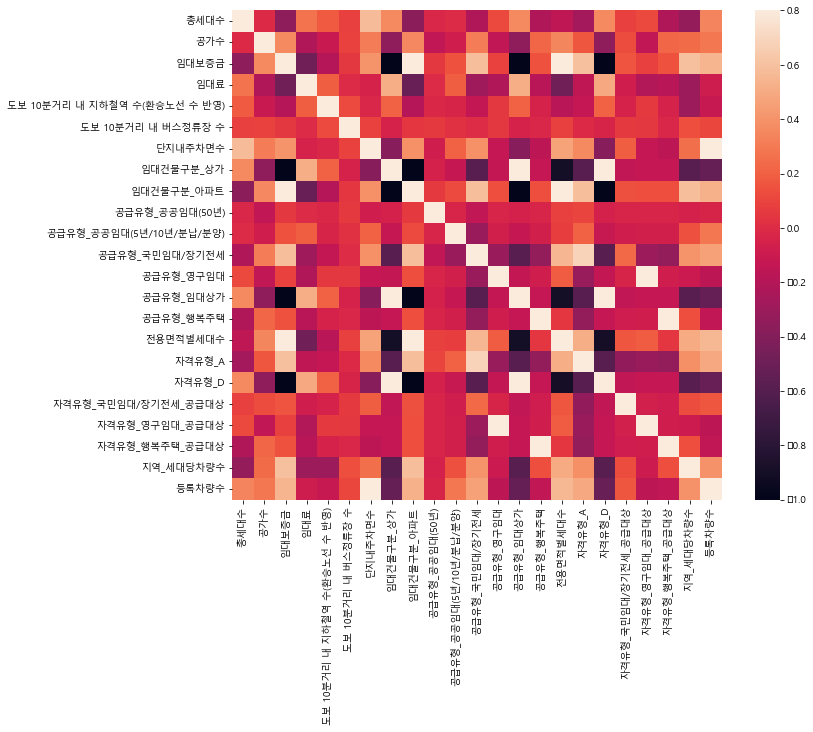

In [872]:
all_data = pd.concat([X,y], axis=1)
corrmat = all_data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

In [ ]:
corrmat['자격유형_D']

In [ ]:
corrmat['등록차량수'].to_frame().sort_values(by='등록차량수',ascending=False)

In [ ]:
def get_top_bottom_coef(model) :
    print(model.coef_)
    coef = pd.Series(model.coef_, index=X.columns)
    
    coef_high = coef.sort_values(ascending=False).head(10) # 회귀계수가 큰 10개
    coef_low = coef.sort_values(ascending=False).tail(10) # -로 표현된 회귀계수에서 절대값이 큰 10개
    
    return coef_high, coef_low

In [ ]:
def visualize_coefficient(models):
    # 3개 회귀 모델의 시각화를 위해 3개의 컬럼을 가지는 subplot 생성
    fig, axs = plt.subplots(figsize=(24,10),nrows=1, ncols=3)
    fig.tight_layout() 
    # 입력인자로 받은 list객체인 models에서 차례로 model을 추출하여 회귀 계수 시각화. 
    for i_num, model in enumerate(models):
        # 상위 10개, 하위 10개 회귀 계수를 구하고, 이를 판다스 concat으로 결합. 
        coef_high, coef_low = get_top_bottom_coef(model)
        coef_concat = pd.concat( [coef_high , coef_low] )
        
        # 순차적으로 ax subplot에 barchar로 표현. 한 화면에 표현하기 위해 tick label 위치와 font 크기 조정. 
        axs[i_num].set_title(model.__class__.__name__ +' Coeffiecents', size=25)
        axs[i_num].tick_params(axis="y",direction="in", pad=-120) # 안쪽, 패딩값
        for label in (axs[i_num].get_xticklabels() + axs[i_num].get_yticklabels()):
            label.set_fontsize(22)
        sns.barplot(x=coef_concat.values, y=coef_concat.index , ax=axs[i_num])

In [ ]:
# from sklearn.linear_model import Ridge, Lasso, ElasticNet

# ridge_params = {'alpha' : [0.05,0.1,1,5,8,10,12,15,20]}
# lasso_params = {'alpha' : [0.001,0.005, 0.008,0.05, 0.03, 0.1, 0.5, 1.5,10]}
# elastic_params = {'alpha' : [0.001,0.005, 0.008,0.05, 0.03, 0.1, 0.5, 1.5,10]}

# ridge_reg = Ridge()
# lasso_reg = Lasso()
# elastic_reg = ElasticNet()

# best_ridge=get_best_params(ridge_reg,ridge_params,X,y)
# best_lasso = get_best_params(lasso_reg,lasso_params,X,y)
# best_elastic = get_best_params(elastic_reg,elastic_params,X,y)

# # lr_reg = LinearRegression()
# ridge_reg = Ridge(alpha=best_ridge.alpha)
# lasso_reg = Lasso(alpha=best_lasso.alpha)
# elastic_reg = ElasticNet(alpha=best_elastic.alpha)

# # 성능 평가
# models = [ridge_reg, lasso_reg, elastic_reg]

# for model in models:
#     kfold_val(5, model, X, y,True)

In [ ]:
# models = [ridge_reg, lasso_reg, elastic_reg]
# visualize_coefficient(models)

In [ ]:
X_test.head()

In [ ]:
X.head()